<a href="https://colab.research.google.com/github/edotheepic/ComVis/blob/main/2440007226_ASSIGNMENT_03_COMP7116001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Eduardo Brilliandy

NIM : 2440007226

### IMPORT LIBRARIES & IMAGE

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/edotheepic/ComVis/main/image7.jpg

--2022-10-25 15:36:27--  https://raw.githubusercontent.com/edotheepic/ComVis/main/image7.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46294 (45K) [image/jpeg]
Saving to: ‘image7.jpg’

image7.jpg          100%[===================>]  45.21K  --.-KB/s    in 0.001s  

2022-10-25 15:36:27 (53.0 MB/s) - ‘image7.jpg’ saved [46294/46294]



### READ IMAGE

Read image, then convert to grayscale, after that downscale image by half

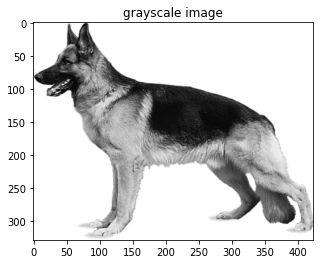

In [2]:
#read image
img = cv.imread('image7.jpg')

#convert to grayscale
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#downscale image
img= cv.resize(img, (0,0), fx=0.5, fy=0.5)

#show image
plt.imshow(img, cmap='gray')
plt.title('grayscale image')
plt.show()

### CANNY EDGE DETECTION

Steps in Canny Algorithm:

1. Noise Reduction
2. Gradient Calculation
3. **Non-maximum Suppression**
4. **Hysteresis Thresholding**

#### 1. Noise Reduction


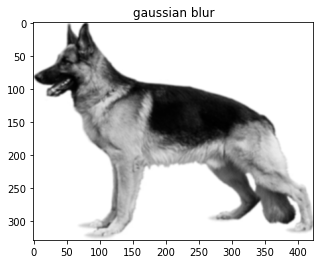

In [3]:
#gaussian blur
blur_img = cv.GaussianBlur(img, (5, 5), 0)

#show image
plt.imshow(blur_img, cmap='gray')
plt.title('gaussian blur')
plt.show()

####2. Gradient Calculation

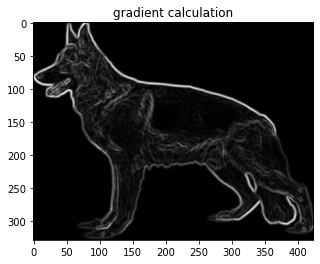

In [4]:
#calc gradient using sobel
gx = cv.Sobel(np.float32(blur_img), cv.CV_64F, 1, 0, 3)
gy = cv.Sobel(np.float32(blur_img), cv.CV_64F, 0, 1, 3)

#get magnitude and angle of the gradient
mag, ang = cv.cartToPolar(gx, gy, angleInDegrees = True)

#show image
plt.imshow(mag, cmap='gray')
plt.title('gradient calculation')
plt.show()

#### 3. **Non-maximum Suppression**

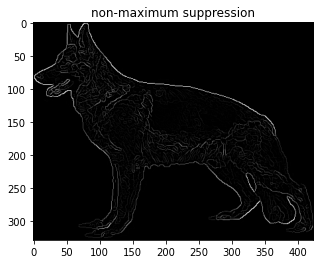

In [5]:
#get the dimensions of the input image  
height, width = img.shape

#copy image to another variable
nms = mag.copy()

#loop through every pixel of the image
for i_x in range(1, width-1):
  for i_y in range(1, height-1):

    #get current angle & clamp the value between 0 tp 180 degrees    
    angle = ang[i_y, i_x]
    angle = abs(angle-180) if abs(angle)>180 else abs(angle)

    #create empty variable to store neighbor magnitude
    p = 0
    q = 0

    #select the neighbours of the target pixel according to the gradient 
    #direction
    #0 degrees (neighbours are left & right)
    if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
      p = mag[i_y,i_x+1]
      q = mag[i_y,i_x-1]
    #45 degrees (neighbours are bottom left & top right)
    elif (22.5 <= angle < 67.5):
      p = mag[i_y+1,i_x+1]
      q = mag[i_y-1,i_x-1]        
    #90 degrees (neighbours are bottom & top)
    elif (67.5 <= angle < 112.5):
      p = mag[i_y+1,i_x]
      q = mag[i_y-1,i_x]
    #135 degrees (neighbours are top left & bottom right)
    elif (112.5 <= angle < 157.5):
      p = mag[i_y-1,i_x+1]
      q = mag[i_y+1,i_x-1]
    
    #suppress non maximum value 
    #if either neighbor is larger, set value to 0
    if(p > mag[i_y,i_x]) or (q > mag[i_y,i_x]):
      nms[i_y,i_x] = 0

#show image
plt.imshow(nms, cmap='gray')
plt.title('non-maximum suppression')
plt.show()

#### 4. **Hysteresis Thresholding**

two steps:
1. double threshold
2. hysteresis/edge linking

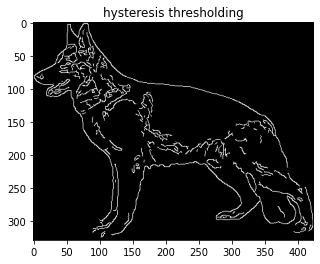

In [6]:
#create variable to store result
res = np.zeros_like(img)

#get maximum value
mag_max = mag.max()

#set thresholds. Strong threshold is double from Weak threshold
th_w = mag_max*0.1
th_s = th_w * 2

#set value for magnitudes that are within the threshold
weak = 100
strong  = 255

#double thresholding for each pixel
for i_x in range(width):
  for i_y in range(height):
              
    mg = nms[i_y, i_x]

    if mg < th_w:
      res[i_y, i_x]= 0
    elif th_w <= mg < th_s:
      res[i_y, i_x]= weak
    else:
      res[i_y, i_x]= strong

#hysteresis for each pixel 
#if pixel is weak & have a strong neighbour -> convert to strong
#if pixel is weak & no strong neighbour -> convert to 0
for i_x in range(1, width-1):
  for i_y in range(1, height-1):
    if (res[i_y,i_x] == weak):
      if ((res[i_y+1, i_x-1] == strong) 
        or (res[i_y+1, i_x] == strong)
        or (res[i_y+1, i_x+1] == strong)
        or (res[i_y, i_x-1] == strong) 
        or (res[i_y, i_x+1] == strong)
        or (res[i_y-1, i_x-1] == strong) 
        or (res[i_y-1, i_x] == strong) 
        or (res[i_y-1, i_x+1] == strong)):
        res[i_y, i_x] = strong
      else:
        res[i_y, i_x] = 0

#show image
plt.imshow(res, cmap='gray')
plt.title('hysteresis thresholding')
plt.show()

#### Side-by-side Comparison

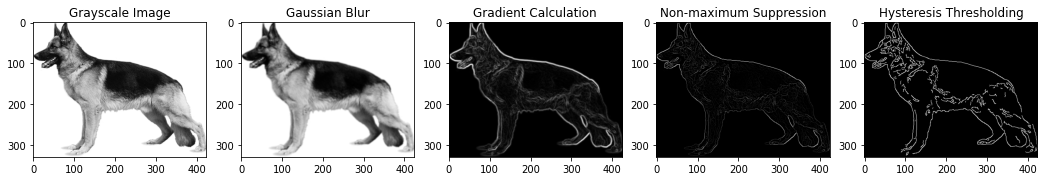

In [7]:
#show result of each step side by side
result_img = [img, blur_img, mag, nms, res]
result_title = ['Grayscale Image', 'Gaussian Blur', 'Gradient Calculation', 'Non-maximum Suppression', 'Hysteresis Thresholding']

plt.figure(figsize=(18,18))

for i, (image, title) in enumerate(zip(result_img,result_title)):
  plt.subplot(1, 5, i+1)
  plt.imshow(image, cmap='gray')
  plt.title(title)

plt.show()